# Chapter 5: Resampling methods

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

import statsmodels.formula.api as smf



%matplotlib inline
plt.style.use('seaborn-white')

### 8) Cross-validation on a simulated data set.


    (a) Generate a simulated data set as follows:
    > set .seed (1)
    > x=rnorm (100)
    > y=x-2* x^2+ rnorm (100)
    In this data set, what is n and what is p? Write out the model
    used to generate the data in equation form.


In [315]:
np.random.seed(1) #Use a seed of the feature vector x in case we need to reproduce
x=np.random.randn(100)
np.random.seed(2) #Use a seed for the noise in case we need to reproduce 
y = x-2*x**2+np.random.randn(100)
d={'y': y, 'x': x}
data=pd.DataFrame(d)
data.head(100)

,y,x
0,-4.069408,1.624345
1,-1.416515,-0.611756
2,-3.222299,-0.528172
3,-1.735221,-1.072969
4,-2.425889,0.865408
...,...,...
95,1.106201,0.077340
96,-0.199852,-0.343854
97,-0.177340,0.043597
98,-0.215271,-0.620001


In this dataset we have n=100 samples as well as p=1 for 1 predictor variable x. 

    (b) Create a scatterplot of X against Y . Comment on what you find.


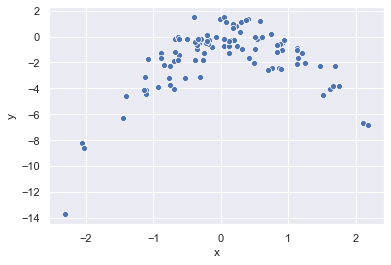

In [316]:
sns.scatterplot(x=data.x, y=data.y)

The simulated data forms a negative quadratic relationship, which is expected due to the equation used to generate it.

    (c) Set a random seed, and then compute the LOOCV errors that 
        result from fitting the following four models using least squares:
            i. Y = β0 + β1X + eps
            ii. Y = β0 + β1X + β2X2 + eps
            iii. Y = β0 + β1X + β2X2 + β3X3 + eps
            iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + eps
    

In [317]:
#Create the required data for the different models..
data['x2']= data.x**2
data['x3']= data.x**3
data['x4']= data.x**4
data.head(100)

,y,x,x2,x3,x4
0,-4.069408,1.624345,2.638498,4.285832,6.961671
1,-1.416515,-0.611756,0.374246,-0.228947,0.140060
2,-3.222299,-0.528172,0.278965,-0.147342,0.077822
3,-1.735221,-1.072969,1.151262,-1.235268,1.325403
4,-2.425889,0.865408,0.748930,0.648130,0.560897
...,...,...,...,...,...
95,1.106201,0.077340,0.005981,0.000463,0.000036
96,-0.199852,-0.343854,0.118235,-0.040656,0.013980
97,-0.177340,0.043597,0.001901,0.000083,0.000004
98,-0.215271,-0.620001,0.384401,-0.238329,0.147764


In [318]:
# LeaveOneOut CV
#i)
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()

X=data.x.to_numpy().reshape(-1,1)
Y=data.y.to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("i) LOOCV MSE: "+str(LOOCV_MSE))

#ii)
X=data[['x','x2']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("ii) LOOCV MSE: "+str(LOOCV_MSE))

#iii)
X=data[['x','x2','x3']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("iii) LOOCV MSE: "+str(LOOCV_MSE))

#iv)
X=data[['x','x2','x3','x4']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("iv) LOOCV MSE: "+str(LOOCV_MSE))


i) LOOCV MSE: 5.695076563868266
ii) LOOCV MSE: 1.1200550996298246
iii) LOOCV MSE: 1.1718451575092657
iv) LOOCV MSE: 1.2502866023861536


We can see that the cross validation model score (MSE) is the lowest when using the 2nd order polynomial model, and that the 2nd best model is the 3th order polynomial model followed by the 4th order polynomial model. The linear 1st order model is very bad relatively.

   (d) Repeat (c) using another random seed, and report your results.
        Are your results the same as what you got in (c)? Why?


In [319]:
np.random.seed(3) #Another random seed for the noise.
#We generate a new y vector using different noise but same x.
#This simulates "resampling" the dataset.
y = x-2*x**2+np.random.randn(100)
d={'y': y, 'x': x, 'x2': x**2, 'x3': x**3, 'x4': x**4}
data=pd.DataFrame(d) 
data.head(100)

,y,x,x2,x3,x4
0,-1.864022,1.624345,2.638498,4.285832,6.961671
1,-0.923738,-0.611756,0.374246,-0.228947,0.140060
2,-0.989605,-0.528172,0.278965,-0.147342,0.077822
3,-5.238985,-1.072969,1.151262,-1.235268,1.325403
4,-0.909841,0.865408,0.748930,0.648130,0.560897
...,...,...,...,...,...
95,-0.044077,0.077340,0.005981,0.000463,0.000036
96,0.098747,-0.343854,0.118235,-0.040656,0.013980
97,-0.815642,0.043597,0.001901,0.000083,0.000004
98,-1.689009,-0.620001,0.384401,-0.238329,0.147764


Let's see how each model performs now:

In [320]:
X=data.x.to_numpy().reshape(-1,1)
Y=data.y.to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("i) LOOCV MSE: "+str(LOOCV_MSE))

#ii)
X=data[['x','x2']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("ii) LOOCV MSE: "+str(LOOCV_MSE))

#iii)
X=data[['x','x2','x3']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("iii) LOOCV MSE: "+str(LOOCV_MSE))

#iv)
X=data[['x','x2','x3','x4']].to_numpy()
LOOCV_MSE = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
print("iv) LOOCV MSE: "+str(LOOCV_MSE))

i) LOOCV MSE: 6.246217498283771
ii) LOOCV MSE: 1.1865756600443786
iii) LOOCV MSE: 1.2026798445064397
iv) LOOCV MSE: 1.2353906118264697


The results are the same which is expected since the underlying distribution of the data is still of the 2nd order. 

    (e) Which of the models in (c) had the smallest LOOCV error? Is
        this what you expected? Explain your answer.


I will perform the same test as I did above multiple times using different noise to further investigate this question. In the below code I perform the same test 100 times.

In [338]:

result=np.zeros(4,dtype='int64') #Keeps track of how many times each model performed the best
loops=100

for k in range(0,loops):
    
    np.random.seed(3+k) #Use a random seed each time the noise vector should be calculated for every dataset.

    
    #Generate a new y vector using different noise but same x to simulate sampling
    y = x-2*x**2+np.random.randn(100)
    d={'y': y, 'x': x, 'x2': x**2, 'x3': x**3, 'x4': x**4}
    data=pd.DataFrame(d) 
    
    scores=np.zeros(4,dtype="float")
    
    #i)
    X=data.x.to_numpy().reshape(-1,1)
    Y=data.y.to_numpy()
    scores[0] = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
    
    #ii)
    X=data[['x','x2']].to_numpy()
    scores[1] = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 

    #iii)
    X=data[['x','x2','x3']].to_numpy()
    scores[2] = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 

    #iv)
    X=data[['x','x2','x3','x4']].to_numpy()
    scores[3] = cross_val_score(regr, X,Y, cv=loo, scoring='neg_mean_squared_error').mean()*-1 
        
    i=np.argmin(scores)
    result[i]=result[i]+1
    
    if i != 1:
        print("Seed for which polynomial degree "+str(i+1)+" is the best: "+str(3+k))
   
print(result)


Seed for which polynomial degree 3 is the best: 6
Seed for which polynomial degree 4 is the best: 8
Seed for which polynomial degree 4 is the best: 14
Seed for which polynomial degree 3 is the best: 22
Seed for which polynomial degree 4 is the best: 23
Seed for which polynomial degree 4 is the best: 34
Seed for which polynomial degree 3 is the best: 35
Seed for which polynomial degree 3 is the best: 37
Seed for which polynomial degree 3 is the best: 39
Seed for which polynomial degree 3 is the best: 41
Seed for which polynomial degree 3 is the best: 42
Seed for which polynomial degree 3 is the best: 44
Seed for which polynomial degree 4 is the best: 47
Seed for which polynomial degree 3 is the best: 53
Seed for which polynomial degree 3 is the best: 61
Seed for which polynomial degree 3 is the best: 69
Seed for which polynomial degree 3 is the best: 76
Seed for which polynomial degree 4 is the best: 79
Seed for which polynomial degree 3 is the best: 90
Seed for which polynomial degree 

The above result tells us that out of 100 simulated datasets, where the only difference between them is the noise when computing y, the 2nd order polynomial model performs the best 78 times. The 3rd degree polynomial performs the best 15 times and the 4th degree polynomial performs the best 7 times. This is determined by the LOOCV MSE for each model.

It is as I said before expected that the 2nd degree polynomial would perform the best, and the result shows that it does exactly that for most of the datasets. I am unsure as to why it does not always do that though. Perhaps the variance in the noise sometimes makes the 3rd and 4th degree a better fit. Another conclusion we can make is that using a linear model is clearly not a good idea to model a quadratic distribution since that model never performed the best for any of the tests.

    (f) Comment on the statistical significance of the coefficient estimates
        that results from fitting each of the models in (c) using
        least squares. Do these results agree with the conclusions drawn
        based on the cross-validation results?

To answer this question, we have to fit each model for the dataset used in c and obtain a summary of the regression fit for each one.

In [331]:
#i)
reg = smf.ols('y ~ x',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.277
Date:                Fri, 20 Mar 2020   Prob (F-statistic):            0.00823
Time:                        16:26:11   Log-Likelihood:                -228.66
No. Observations:                 100   AIC:                             461.3
Df Residuals:                      98   BIC:                             466.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6668      0.241     -6.913      0.000      -2.145      -1.188
x              0.7331      0.272      2.698      0.008       0.194       1.272
==============================================================================
Omnibus:                       40.780   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.701
Skew:                          -1.619   Prob(JB):                     2.46e-19
Kurtosis:                       6.176   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
#ii)
reg = smf.ols('y ~ x + x2',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     214.3
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           2.56e-36
Time:                        16:26:12   Log-Likelihood:                -147.75
No. Observations:                 100   AIC:                             301.5
Df Residuals:                      97   BIC:                             309.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1653      0.132     -1.254      0.213      -0.427       0.096
x              0.9586      0.122      7.847      0.000       0.716       1.201
x2            -1.9248      0.097    -19.804      0.000      -2.118      -1.732
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.741
Skew:                           0.017   Prob(JB):                        0.691
Kurtosis:                       2.580   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
#iii)
reg = smf.ols('y ~ x + x2 + x3',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           4.15e-35
Time:                        16:26:12   Log-Likelihood:                -147.73
No. Observations:                 100   AIC:                             303.5
Df Residuals:                      96   BIC:                             313.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1668      0.133     -1.257      0.212      -0.430       0.097
x              0.9188      0.215      4.264      0.000       0.491       1.347
x2            -1.9228      0.098    -19.608      0.000      -2.117      -1.728
x3             0.0168      0.075      0.225      0.822      -0.131       0.165
==============================================================================
Omnibus:                        0.639   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.728
Skew:                           0.019   Prob(JB):                        0.695
Kurtosis:                       2.584   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
#iv)
reg = smf.ols('y ~ x + x2 + x3 + x4',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           5.32e-34
Time:                        16:26:13   Log-Likelihood:                -147.71
No. Observations:                 100   AIC:                             305.4
Df Residuals:                      95   BIC:                             318.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1529      0.161     -0.948      0.345      -0.473       0.167
x              0.9192      0.217      4.244      0.000       0.489       1.349
x2            -1.9655      0.294     -6.683      0.000      -2.549      -1.382
x3             0.0183      0.076      0.242      0.809      -0.132       0.168
x4             0.0104      0.068      0.154      0.878      -0.124       0.145
==============================================================================
Omnibus:                        0.568   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.680
Skew:                           0.025   Prob(JB):                        0.712
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This test shows that x2 is the most significant variable which is expected. It also shows that x3 and x4 are not statistically significant, which makes sense considering the underlying distribution is a 2nd degree polynomial. Also, x is deemed significant which also makes sense since it is also included as a term in the underlying distribution. These results definetely agree with previous conclusions.

However, what happens if we use a sampled simulated dataset for which the 4th or 3rd degree polynomial model is the best choice according to LOOCV? Let us try with a dataset where 4th degree is recommended:


In [341]:
# Get a dataset used in exercise c where LOOCV indicates 4th degree polynomial model is best.
np.random.seed(8) #Generates one of the datasets used in previous exercises where the above is true
y = x-2*x**2+np.random.randn(100)
d={'y': y, 'x': x,'x2':x**2,'x3':x**3,'x4':x**4}
data=pd.DataFrame(d)
data.head(100)

,y,x,x2,x3,x4
0,-3.561446,1.624345,2.638498,4.285832,6.961671
1,-0.268965,-0.611756,0.374246,-0.228947,0.140060
2,-3.033073,-0.528172,0.278965,-0.147342,0.077822
3,-4.761841,-1.072969,1.151262,-1.235268,1.325403
4,-2.928945,0.865408,0.748930,0.648130,0.560897
...,...,...,...,...,...
95,1.215458,0.077340,0.005981,0.000463,0.000036
96,-0.495879,-0.343854,0.118235,-0.040656,0.013980
97,2.526043,0.043597,0.001901,0.000083,0.000004
98,-1.583158,-0.620001,0.384401,-0.238329,0.147764


In [343]:
#iii)
reg = smf.ols('y ~ x + x2 + x3',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.54e-31
Time:                        16:35:59   Log-Likelihood:                -150.84
No. Observations:                 100   AIC:                             309.7
Df Residuals:                      96   BIC:                             320.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1065      0.137     -0.778      0.438      -0.378       0.165
x              0.7507      0.222      3.377      0.001       0.309       1.192
x2            -1.7770      0.101    -17.567      0.000      -1.978      -1.576
x3             0.0553      0.077      0.718      0.475      -0.098       0.208
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.311
Skew:                          -0.136   Prob(JB):                        0.856
Kurtosis:                       2.969   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
#iv)
reg = smf.ols('y ~ x + x2 + x3 + x4',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     90.72
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.39e-31
Time:                        16:35:34   Log-Likelihood:                -148.13
No. Observations:                 100   AIC:                             306.3
Df Residuals:                      95   BIC:                             319.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1023      0.162      0.632      0.529      -0.219       0.424
x              0.7578      0.218      3.484      0.001       0.326       1.190
x2            -2.4163      0.295     -8.182      0.000      -3.003      -1.830
x3             0.0781      0.076      1.028      0.306      -0.073       0.229
x4             0.1565      0.068      2.297      0.024       0.021       0.292
==============================================================================
Omnibus:                        1.650   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.119
Skew:                          -0.217   Prob(JB):                        0.572
Kurtosis:                       3.283   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case we can see from the two fits that the x3 term is not significant, but the x4 is. Lets fit a final model which includes x, x2 and x4 but removes x3:

In [344]:
reg = smf.ols('y ~ x + x2 + x4',data=data).fit() 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     120.5
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.96e-32
Time:                        16:37:10   Log-Likelihood:                -148.69
No. Observations:                 100   AIC:                             305.4
Df Residuals:                      96   BIC:                             315.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0968      0.162      0.598      0.551      -0.224       0.418
x              0.9396      0.127      7.414      0.000       0.688       1.191
x2            -2.3878      0.294     -8.119      0.000      -2.972      -1.804
x4             0.1474      0.068      2.181      0.032       0.013       0.281
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.314
Skew:                          -0.243   Prob(JB):                        0.518
Kurtosis:                       3.281   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems as in this case, where the LOOCV score indicates that the 4th degree polynomial model is the best one, the t-statistic for the 4th degree term x4 is significant but just barely. It does not really pass the significance test of |t| >> 2, and could be risky to be included in the model, but also risky to remove.

It makes sense that the t-statistic would be close to the decision boundary of whether to include the term or not, since in reality we know that it would probably be better to not include it but the dataset sampling in this case seems to have led to a different result due to the noise variance.

Similarly, we can determine that the reason x4 is significant and that LOOCV for this data tells us that the x4 model is the best is probably also because of the variance the noise introduces. In fact, the appropiate model should be a x2 model and the LOOCV score is correct in this for 75% of the tests performed. It seems like the method is still quite good though since it always tells us to use a model close to the actual best one. It seems more likely to propose a polynomial degree close to the actual best value. For example the linear model is really bad and it is never proposed to be used, and the LOOCV method more often says that 3rd degree is the best than it says that the 4th degree is the best.